In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import FunctionTransformer
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import VarianceThreshold
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import RFECV
from sklearn import set_config
set_config(transform_output="pandas")



In [23]:


df_regular = pd.read_csv("2021-2022 NBA Player Stats - Regular.csv",encoding='latin-1', delimiter=";")

df_playoffs = pd.read_csv("2021-2022 NBA Player Stats - Playoffs.csv",encoding='latin-1', delimiter=";")


In [24]:

df_regular.head()

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Precious Achiuwa,C,22,TOR,73,28,23.6,3.6,8.3,...,0.595,2.0,4.5,6.5,1.1,0.5,0.6,1.2,2.1,9.1
1,2,Steven Adams,C,28,MEM,76,75,26.3,2.8,5.1,...,0.543,4.6,5.4,10.0,3.4,0.9,0.8,1.5,2.0,6.9
2,3,Bam Adebayo,C,24,MIA,56,56,32.6,7.3,13.0,...,0.753,2.4,7.6,10.1,3.4,1.4,0.8,2.6,3.1,19.1
3,4,Santi Aldama,PF,21,MEM,32,0,11.3,1.7,4.1,...,0.625,1.0,1.7,2.7,0.7,0.2,0.3,0.5,1.1,4.1
4,5,LaMarcus Aldridge,C,36,BRK,47,12,22.3,5.4,9.7,...,0.873,1.6,3.9,5.5,0.9,0.3,1.0,0.9,1.7,12.9


In [25]:
df_playoffs.head()

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Precious Achiuwa,C,22,TOR,6,1,27.8,4.2,8.7,...,0.600,1.3,3.5,4.8,1.0,0.2,0.8,1.5,2.3,10.2
1,2,Steven Adams,C,28,MEM,7,5,16.3,1.3,3.0,...,0.545,2.1,4.3,6.4,2.1,0.1,0.1,0.6,1.7,3.4
2,3,Bam Adebayo,C,24,MIA,18,18,34.1,5.8,9.7,...,0.763,2.1,5.9,8.0,2.7,1.0,0.7,2.1,3.1,14.8
3,4,Nickeil Alexander-Walker,SG,23,UTA,1,0,5.0,2.0,2.0,...,1.000,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,5.0
4,5,Grayson Allen,SG,26,MIL,12,5,25.4,3.1,6.8,...,0.636,0.4,2.5,2.9,1.3,0.7,0.3,0.8,1.8,8.3


In [26]:
df_regular.shape, df_playoffs.shape

((812, 30), (217, 30))

In [27]:
df_regular.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 812 entries, 0 to 811
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rk      812 non-null    int64  
 1   Player  812 non-null    object 
 2   Pos     812 non-null    object 
 3   Age     812 non-null    int64  
 4   Tm      812 non-null    object 
 5   G       812 non-null    int64  
 6   GS      812 non-null    int64  
 7   MP      812 non-null    float64
 8   FG      812 non-null    float64
 9   FGA     812 non-null    float64
 10  FG%     812 non-null    float64
 11  3P      812 non-null    float64
 12  3PA     812 non-null    float64
 13  3P%     812 non-null    float64
 14  2P      812 non-null    float64
 15  2PA     812 non-null    float64
 16  2P%     812 non-null    float64
 17  eFG%    812 non-null    float64
 18  FT      812 non-null    float64
 19  FTA     812 non-null    float64
 20  FT%     812 non-null    float64
 21  ORB     812 non-null    float64
 22  DR

In [28]:
df_playoffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217 entries, 0 to 216
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rk      217 non-null    int64  
 1   Player  217 non-null    object 
 2   Pos     217 non-null    object 
 3   Age     217 non-null    int64  
 4   Tm      217 non-null    object 
 5   G       217 non-null    int64  
 6   GS      217 non-null    int64  
 7   MP      217 non-null    float64
 8   FG      217 non-null    float64
 9   FGA     217 non-null    float64
 10  FG%     217 non-null    float64
 11  3P      217 non-null    float64
 12  3PA     217 non-null    float64
 13  3P%     217 non-null    float64
 14  2P      217 non-null    float64
 15  2PA     217 non-null    float64
 16  2P%     217 non-null    float64
 17  eFG%    217 non-null    float64
 18  FT      217 non-null    float64
 19  FTA     217 non-null    float64
 20  FT%     217 non-null    float64
 21  ORB     217 non-null    float64
 22  DR

In [29]:

# rename columns for better interpretability.  Took directly from kaggle dataset page.

def rename_columns(df):
    df.rename(columns={'Rk' : 'Rank', 'Player' : 'Players_name', 'Pos' : 'Position', 'Age' : 'Players_age', 'Tm' : 'Team', 'G' : 'Games_played', 'GS' : 'Games_started', 'MP' : 'Minutes_played_per_game', 'FG' : 'Field_goals_per_game', 'FGA' : 'Field_goal_attempts_per_game', 'FG%' : 'Field_goal_percentage', '3P' : '3_point_field_goals_per_game', '3PA' : '3_point_field_goal_attempts_per_game', '3P%' : '3_point_field_goal_percentage', '2P' : '2_point_field_goals_per_game', '2PA' : '2_point_field_goal_attempts_per_game', '2P%' : '2_point_field_goal_percentage', 'eFG%' : 'Effective_field_goal_percentage', 'FT' : 'Free_throws_per_game', 'FTA' : 'Free_throw_attempts_per_game', 'FT%' : 'Free_throw_percentage', 'ORB' : 'Offensive_rebounds_per_game', 'DRB' : 'Defensive_rebounds_per_game', 'TRB' : 'Total_rebounds_per_game', 'AST' : 'Assists_per_game', 'STL' : 'Steals_per_game', 'BLK' : 'Blocks_per_game', 'TOV' : 'Turnovers_per_game', 'PF' : 'Personal_fouls_per_game', 'PTS' : 'Points_per_game'}, inplace=True)
    return df

df_regular = rename_columns(df_regular)

df_playoffs = rename_columns(df_playoffs)

In [30]:
# Looking at value counts of Position.  We'll consider using this as our target variable.

df_regular.Position.value_counts(dropna=False)

SG       199
SF       158
PG       155
PF       152
C        130
SG-SF      5
SF-SG      5
SG-PG      4
C-PF       2
PF-SF      1
PG-SG      1
Name: Position, dtype: int64

In [31]:
# streamline position column to only have guard, forward, and center (3 classes)

def convert_position(df):
    df['Class'] = df['Position'].map({'SG': 'Guard','SF' : 'Forward', 'PG' : 'Guard', 'PF' : 'Forward', 'C' : 'Center','SG-SF' : 'Guard', 'SF-SG' : 'Forward', 'SG-PG' : 'Guard', 'C-PF' : 'Center', 'PF-SF' : 'Forward', 'PG-SG' : 'Guard'})
    df.drop(columns=['Position'], inplace=True)
    return df

df_regular = convert_position(df_regular)
df_playoffs = convert_position(df_playoffs)


In [32]:
# review class distribution of both datasets

class_balance = pd.DataFrame([df_regular.Class.value_counts() / df_regular.Class.value_counts().sum(), df_playoffs.Class.value_counts() / df_playoffs.Class.value_counts().sum()]).T
class_balance.columns = ['Regular Season', 'Playoffs']
class_balance

,Regular Season,Playoffs
Guard,0.448276,0.405530
Forward,0.389163,0.410138
Center,0.162562,0.184332


In [33]:
# encode class column as numeric using LabelEncoder

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df_regular['Class'] = le.fit_transform(df_regular['Class'])
df_playoffs['Class'] = le.fit_transform(df_playoffs['Class'])

In [34]:
le.classes_

array(['Center', 'Forward', 'Guard'], dtype=object)

In [14]:
# we check for missing values and we don't find any

df_regular.isna().sum()

Rank                                    0
Players_name                            0
Players_age                             0
Team                                    0
Games_played                            0
Games_started                           0
Minutes_played_per_game                 0
Field_goals_per_game                    0
Field_goal_attempts_per_game            0
Field_goal_percentage                   0
3_point_field_goals_per_game            0
3_point_field_goal_attempts_per_game    0
3_point_field_goal_percentage           0
2_point_field_goals_per_game            0
2_point_field_goal_attempts_per_game    0
2_point_field_goal_percentage           0
Effective_field_goal_percentage         0
Free_throws_per_game                    0
Free_throw_attempts_per_game            0
Free_throw_percentage                   0
Offensive_rebounds_per_game             0
Defensive_rebounds_per_game             0
Total_rebounds_per_game                 0
Assists_per_game                  

In [15]:
# We create some extra features.  My hopethesis is that the ratios of some statistics relative to the sum of those stats might be more predictive than the absolute stats in certain instances.  I've followed basketball (and played) my entire life so my intuition is that we can use these ratios to predict a player's position.

df_regular['Total_stats'] = df_regular['Points_per_game'] + df_regular['Total_rebounds_per_game'] + df_regular['Assists_per_game'] + df_regular['Steals_per_game'] + df_regular['Blocks_per_game'] + df_regular['Turnovers_per_game'] + df_regular['3_point_field_goals_per_game']

df_regular['Total_stats'].describe()
df_regular[df_regular.Total_stats == 0]

df_regular['Points_per_game_percentage'] = df_regular['Points_per_game'] / df_regular['Total_stats']
df_regular['Total_rebounds_per_game_percentage'] = df_regular['Total_rebounds_per_game'] / df_regular['Total_stats']
df_regular['Assists_per_game_percentage'] = df_regular['Assists_per_game'] / df_regular['Total_stats']
df_regular['Steals_per_game_percentage'] = df_regular['Steals_per_game'] / df_regular['Total_stats']
df_regular['Blocks_per_game_percentage'] = df_regular['Blocks_per_game'] / df_regular['Total_stats']
df_regular['Turnovers_per_game_percentage'] = df_regular['Turnovers_per_game'] / df_regular['Total_stats']
df_regular['3_point_field_goals_per_game_percentage'] = df_regular['3_point_field_goals_per_game'] / df_regular['Total_stats']

df_regular = df_regular[df_regular['Total_stats'] != 0]

In [16]:
# create the same extra features for the playoffs dataset

df_playoffs['Total_stats'] = df_playoffs['Points_per_game'] + df_playoffs['Total_rebounds_per_game'] + df_playoffs['Assists_per_game'] + df_playoffs['Steals_per_game'] + df_playoffs['Blocks_per_game'] + df_playoffs['Turnovers_per_game'] + df_playoffs['3_point_field_goals_per_game']

df_playoffs['Points_per_game_percentage'] = df_playoffs['Points_per_game'] / df_playoffs['Total_stats']
df_playoffs['Total_rebounds_per_game_percentage'] = df_playoffs['Total_rebounds_per_game'] / df_playoffs['Total_stats']
df_playoffs['Assists_per_game_percentage'] = df_playoffs['Assists_per_game'] / df_playoffs['Total_stats']
df_playoffs['Steals_per_game_percentage'] = df_playoffs['Steals_per_game'] / df_playoffs['Total_stats']
df_playoffs['Blocks_per_game_percentage'] = df_playoffs['Blocks_per_game'] / df_playoffs['Total_stats']
df_playoffs['Turnovers_per_game_percentage'] = df_playoffs['Turnovers_per_game'] / df_playoffs['Total_stats']
df_playoffs['3_point_field_goals_per_game_percentage'] = df_playoffs['3_point_field_goals_per_game'] / df_playoffs['Total_stats']

df_playoffs = df_playoffs[df_playoffs['Total_stats'] != 0]

In [17]:
# split data into train and test

from sklearn.model_selection import train_test_split

X = df_regular.drop(columns=['Class'])
y = df_regular['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# separate categorical columns from numeric

passthrough = ['Players_name', 'Team']
mask = X_train.dtypes == 'object'
categorical = X_train.columns[mask].drop(passthrough)
numeric = X_train.columns[~mask]


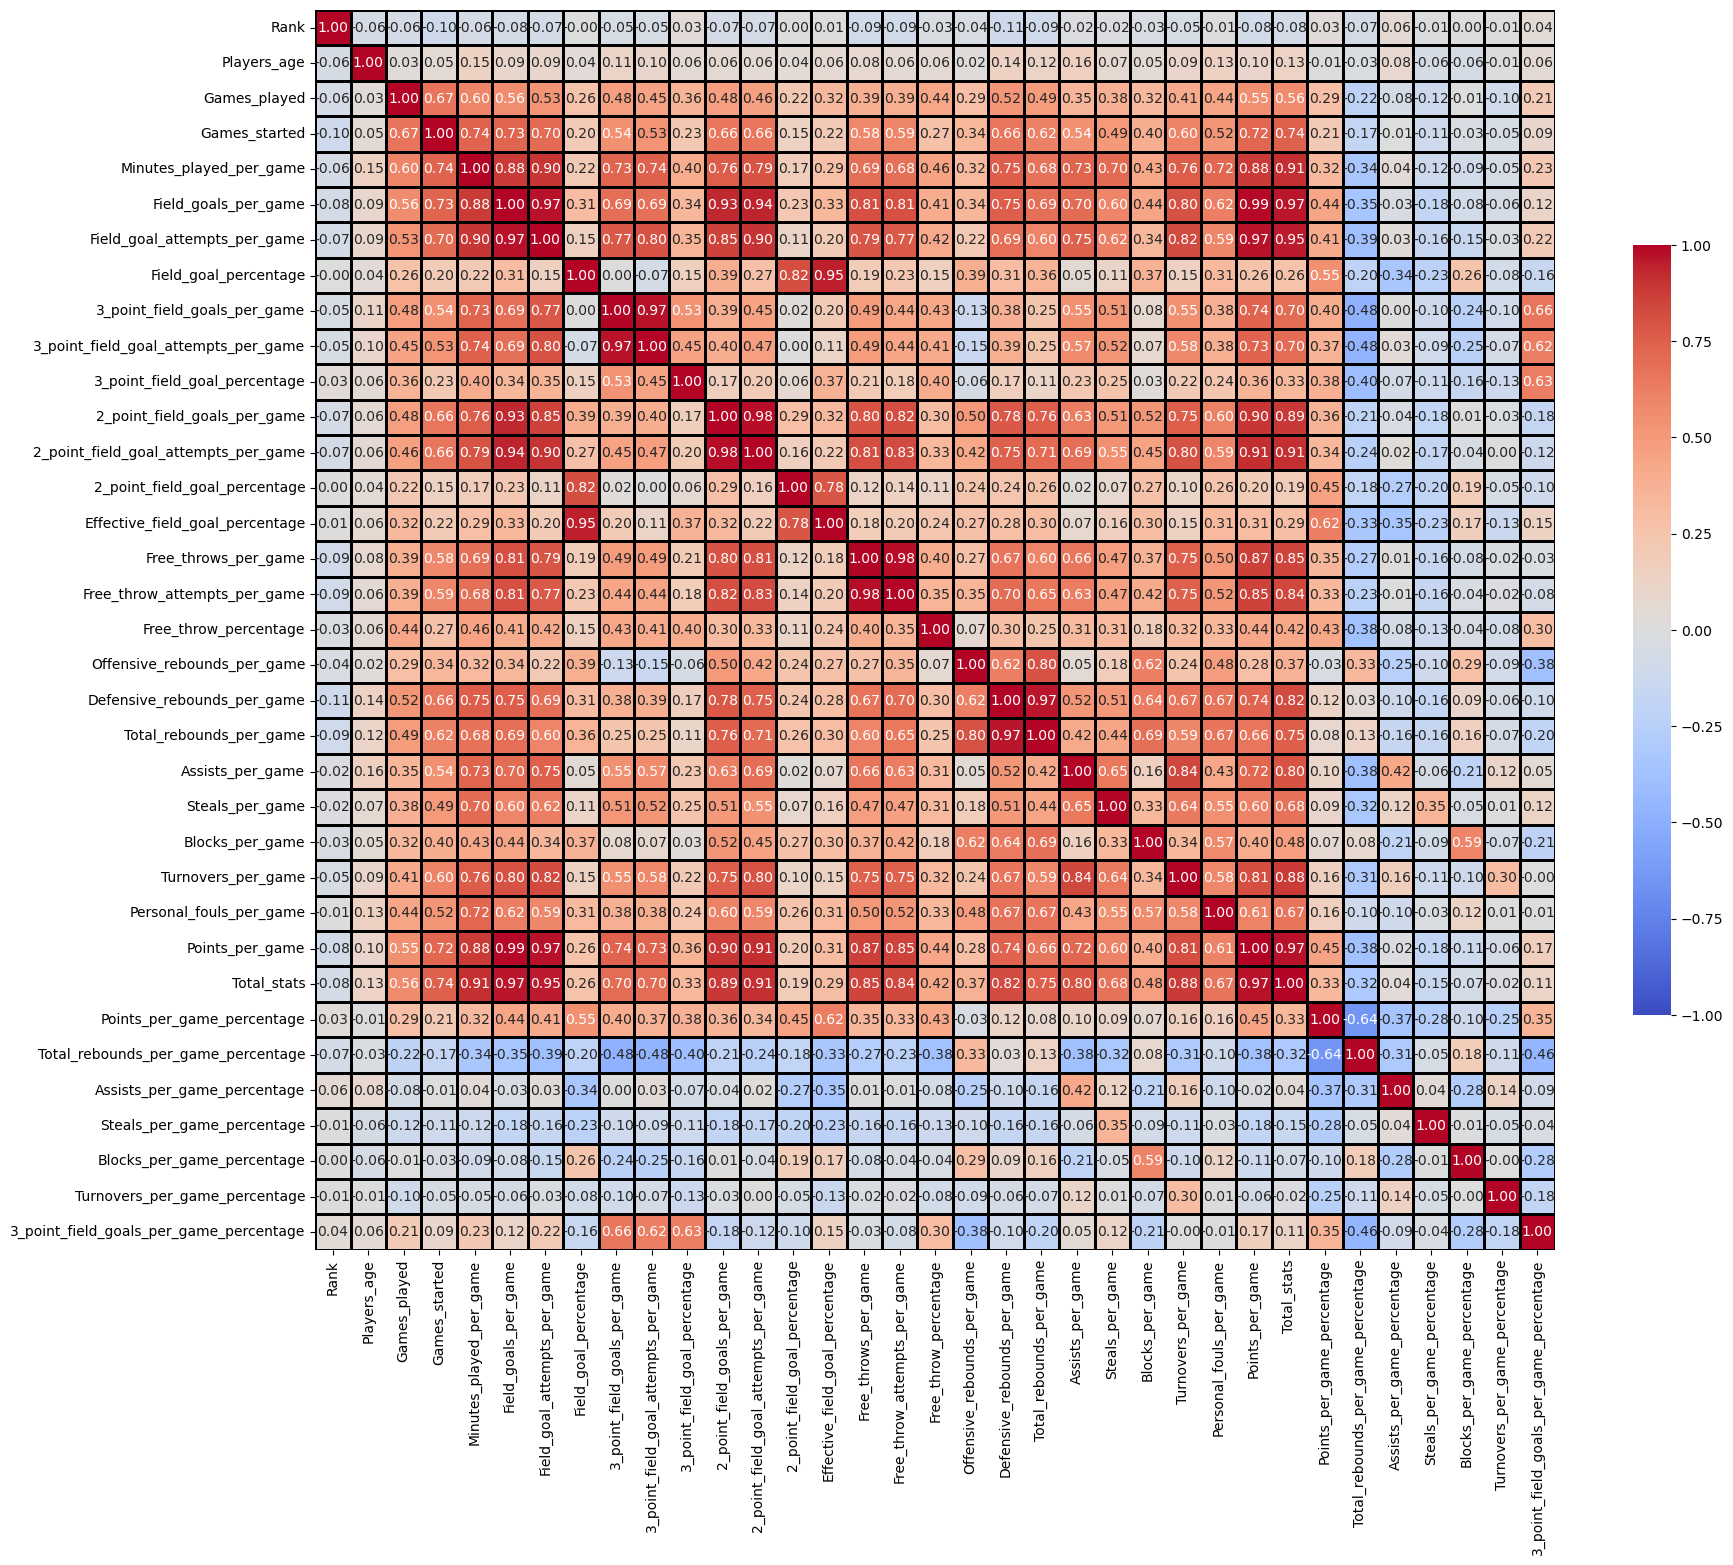

In [18]:
# plot correlation matrix using seaborn

corr = X_train[numeric].corr()
plt.figure(figsize=(20,20))
# plot the heatmap and order it by strongest correlations
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0, vmin=-1, vmax=1, fmt='.2f', linewidths=1, linecolor='black', square=True, cbar_kws={'shrink': 0.5}, xticklabels=corr.columns, yticklabels=corr.columns)
plt.show()

In [19]:
from sklearn.dummy import DummyClassifier

dummy = DummyClassifier(strategy='most_frequent')
dummy.fit(X_train[numeric], y_train)
dummy.score(X_test[numeric], y_test)


0.45625

In [20]:
from time import time
tic_fwd = time()

In [21]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=10000)
sfs = SequentialFeatureSelector(lr, n_features_to_select=5, direction="forward", cv=5, n_jobs=-1)
sfs.fit(X_train[numeric], y_train)
toc_fwd = time()

In [22]:

print(
    "Features selected by forward sequential selection: "
    f"{sfs.get_feature_names_out()}"
)

Features selected by forward sequential selection: ['Field_goal_attempts_per_game' '2_point_field_goals_per_game'
 'Offensive_rebounds_per_game' 'Assists_per_game'
 'Total_rebounds_per_game_percentage']


In [23]:
best_features = sfs.get_feature_names_out()
lr.fit(X_train[best_features], y_train)
lr.score(X_test[best_features], y_test)

0.7875

              precision    recall  f1-score   support

           0       0.59      0.76      0.67        21
           1       0.79      0.67      0.72        66
           2       0.86      0.90      0.88        73

    accuracy                           0.79       160
   macro avg       0.75      0.78      0.76       160
weighted avg       0.79      0.79      0.79       160



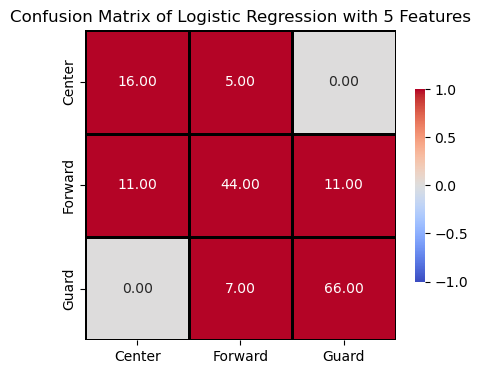

In [24]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

print(classification_report(y_test, lr.predict(X_test[best_features])))

cm = confusion_matrix(y_test, lr.predict(X_test[best_features]))

# add labels to the confusion matrix for Center, Forward, Guard

cm = pd.DataFrame(cm, index=le.classes_,columns=le.classes_)

# plot the confusion matrix using seaborn

plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, cmap='coolwarm', center=0, vmin=-1, vmax=1, fmt='.2f', linewidths=1, linecolor='black', square=True, cbar_kws={'shrink': 0.5}, xticklabels=cm.columns, yticklabels=cm.index)
plt.title('Confusion Matrix of Logistic Regression with 5 Features')
plt.show()


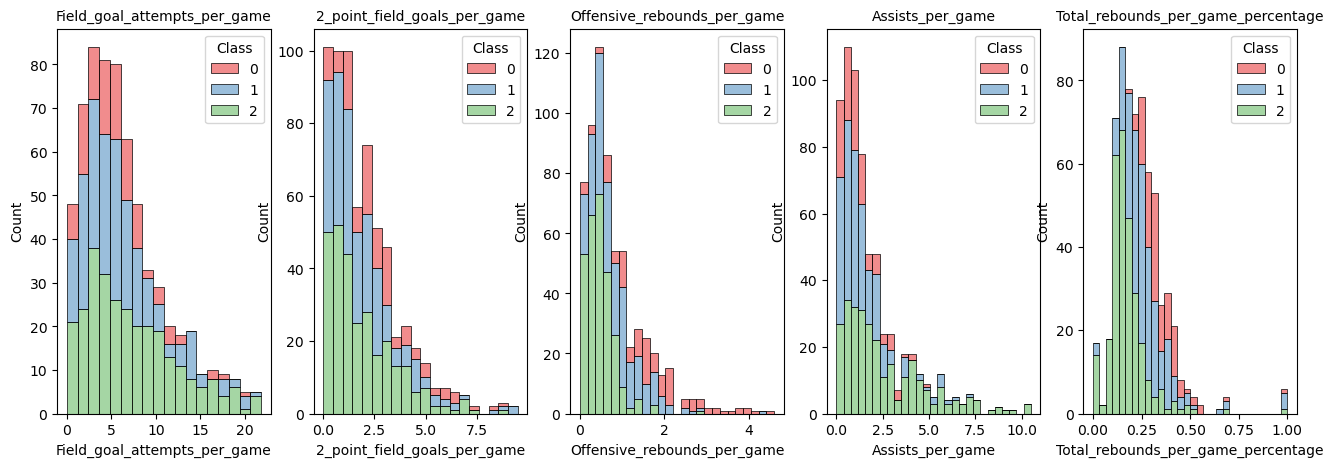

In [25]:
# plot overlapping histograms in subplots for each best feature colored by class
# make plot background white
fig, axes = plt.subplots(1, 5, figsize=(16, 5))
for i, feature in enumerate(best_features):
    sns.histplot(data=X_train, x=feature, hue=y_train, ax=axes[i], palette='Set1', multiple='stack', edgecolor='black', linewidth=0.5, alpha=0.5)
    axes[i].set_title(feature, fontsize=10)
plt.show()


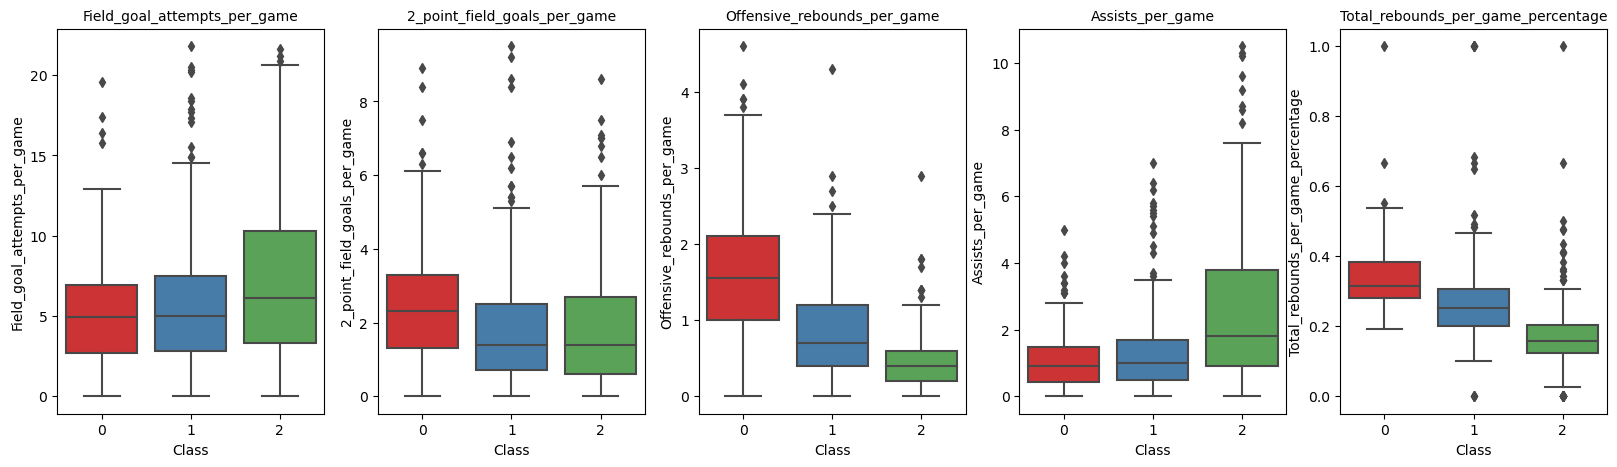

In [26]:
# plot boxplots for each best feature colored by class
fig, axes = plt.subplots(1, 5, figsize=(20, 5))
for i, feature in enumerate(best_features):
    sns.boxplot(x=y_train, y=X_train[feature], ax=axes[i], palette='Set1')
    axes[i].set_title(feature, fontsize=10)
plt.show()

In [27]:
# score logistic regression model on df_playoffs.  Split train and test

X_playoff = df_playoffs.drop(columns=['Class'])
y_playoff = df_playoffs['Class']

X_train_playoffs, X_test_playoffs, y_train_playoffs, y_test_playoffs = train_test_split(X_playoff, y_playoff, test_size=0.2, random_state=42)

lr.score(X_test_playoffs[best_features], y_test_playoffs)

0.6976744186046512

In [28]:

# do pca on the numeric data
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

scaler = StandardScaler()
pca = PCA(n_components=5)
ohe = OneHotEncoder(handle_unknown='ignore')

# create column transformer for scaler and pca on numeric columns, and one hot encoder on categorical columns

numeric_transforms = Pipeline([('scaler', scaler), ('pca', pca)])
#ncategorical_transforms = Pipeline([('onehot', ohe)])

preprocessor = ColumnTransformer([('num', numeric_transforms, numeric)], remainder='passthrough')


In [29]:
x_pca = numeric_transforms.fit_transform(X_train[numeric])
numeric_transforms.named_steps['pca'].explained_variance_ratio_

array([0.41483928, 0.12130069, 0.09690295, 0.05030543, 0.04089328])

In [30]:
colors = {0:'red', 1:'blue', 2:'green'}

labels = le.classes_.tolist()
labels

['Center', 'Forward', 'Guard']

In [31]:
x_pca

,pca0,pca1,pca2,pca3,pca4
268,0.015258,1.415864,-0.614655,-0.573127,0.363851
627,0.959431,-0.956316,-1.153329,-0.497994,0.555382
334,1.844155,-0.258544,0.467565,0.282093,0.694752
348,-4.969734,0.422191,0.827989,3.316337,-0.166245
402,0.494158,-2.173654,-0.289574,0.681673,0.402485
...,...,...,...,...,...
71,-1.031686,-0.759370,-0.586390,-0.120676,-0.898914
106,7.843707,0.961828,2.341170,2.313824,-1.245547
274,-2.851524,-1.725796,-1.144997,0.649846,0.145869
444,-0.183861,-0.845176,-1.244883,-0.565959,-0.234262


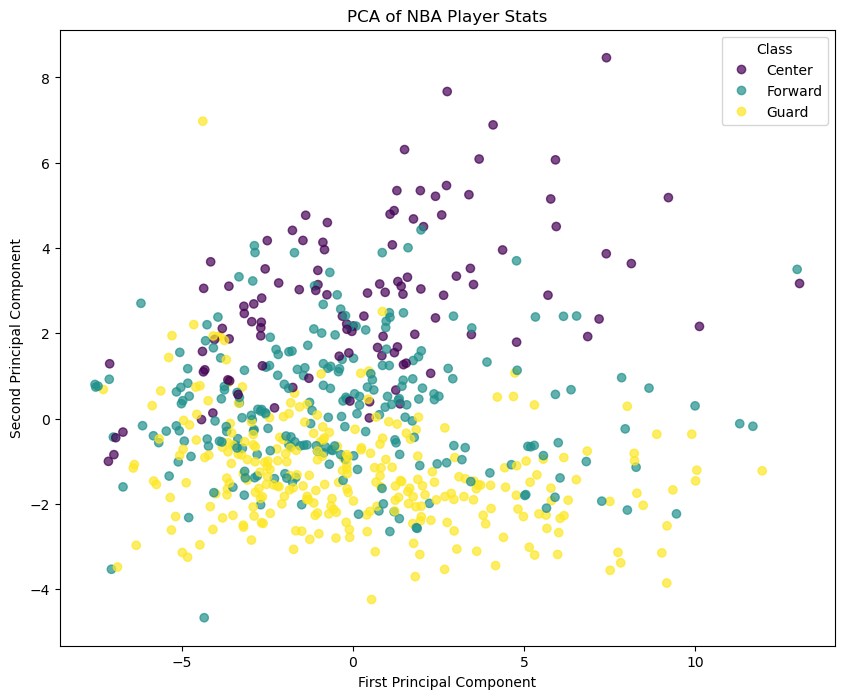

In [32]:
# annotate the plot with the most important columns to each principal component and use an arrow to show the direction of the principal component

plt.figure(figsize=(10,8))
scatter = plt.scatter(x_pca.pca0,x_pca.pca1,c=y_train.astype('category').cat.codes, alpha=0.7)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA of NBA Player Stats')
plt.legend(handles=scatter.legend_elements()[0], labels = labels, title="Class")
plt.show()

In [33]:
# which variables contribute the most to the first component
first_comp = pd.DataFrame(pca.components_[0],index=numeric,columns=['First Component'])
first_comp.sort_values(by='First Component',ascending=False).head(10)


,First Component
Total_stats,0.258946
Points_per_game,0.254789
Field_goals_per_game,0.254025
Field_goal_attempts_per_game,0.247527
Minutes_played_per_game,0.243387
2_point_field_goal_attempts_per_game,0.236799
2_point_field_goals_per_game,0.234334
Turnovers_per_game,0.220481
Free_throw_attempts_per_game,0.219175
Free_throws_per_game,0.219027


In [34]:
# which variables contribute the most to the third component
third_comp = pd.DataFrame(pca.components_[2],index=numeric,columns=['Third Component'])
third_comp.sort_values(by='Third Component',ascending=False).head(10)


,Third Component
Assists_per_game_percentage,0.255748
Total_rebounds_per_game_percentage,0.205266
Assists_per_game,0.171267
Turnovers_per_game,0.156127
Turnovers_per_game_percentage,0.146851
Steals_per_game_percentage,0.132482
2_point_field_goal_attempts_per_game,0.100008
Steals_per_game,0.099378
Free_throw_attempts_per_game,0.090945
Defensive_rebounds_per_game,0.090147


In [35]:
# create logistic regression model to predict 'Class' based on pca components

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

pipe = Pipeline(steps=[('preprocessing', numeric_transforms), ('classifier', lr)])


In [36]:
pipe.fit(X_train[numeric], y_train)

Pipeline(steps=[('preprocessing',
                 Pipeline(steps=[('scaler', StandardScaler()),
                                 ('pca', PCA(n_components=5))])),
                ('classifier', LogisticRegression(max_iter=10000))])

## Do PCA with new features

In [37]:
predictions = pipe.predict(X_test[numeric])

# get accuracy score
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

0.7625

In [38]:

from sklearn.model_selection import GridSearchCV

param_grid = {'C' : [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'penalty' : ['l1', 'l2']}
grid = GridSearchCV(lr, param_grid, cv=5, verbose=0)
grid.fit(X_train[best_features], y_train)

# print best parameters and best score in sentence
print(f"Best parameters: {grid.best_params_}")
print(f"Best score: {grid.best_score_}")


Best parameters: {'C': 1, 'penalty': 'l2'}
Best score: 0.7140625


/home/vpittamp/ls/envs/cs109a_finalproj/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
35 fits failed out of a total of 70.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
35 fits failed with the following error:
Traceback (most recent call last):
  File "/home/vpittamp/ls/envs/cs109a_finalproj/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/vpittamp/ls/envs/cs109a_finalproj/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

In [40]:
grid.score(X_test[best_features], y_test)

0.7875

In [42]:
grid.best_estimator_

LogisticRegression(C=1, max_iter=10000)

In [59]:

from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()

# tune hyperparameters of random forest model to improve accuracy score of model on test set (X_test, y_test) using GridSearchCV and cross validation on training set (X, y_train) to find best parameters for model

param_grid = {'n_estimators' : [10, 50, 100, 200, 500], 'max_depth' : [None, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}
grid_cv = GridSearchCV(rfc, param_grid, cv=5, verbose=1)
grid_cv.fit(X_train[numeric], y_train)

best_max_depth = grid_cv.best_params_['max_depth']
best_n_estimators = grid_cv.best_params_['n_estimators']

grid.best_score_

# create new model with best parameters from grid search

rfc2 = RandomForestClassifier(max_depth= best_max_depth, n_estimators=best_n_estimators)
rfc2.fit(X_train[numeric], y_train)


y_pred2 = rfc2.predict(X_test[numeric])

accuracy_score(y_test, y_pred2)

Fitting 5 folds for each of 55 candidates, totalling 275 fits
[CV 1/5] END ...max_depth=None, n_estimators=10;, score=0.742 total time=   0.0s
[CV 2/5] END ...max_depth=None, n_estimators=10;, score=0.617 total time=   0.0s
[CV 3/5] END ...max_depth=None, n_estimators=10;, score=0.711 total time=   0.0s
[CV 4/5] END ...max_depth=None, n_estimators=10;, score=0.711 total time=   0.0s
[CV 5/5] END ...max_depth=None, n_estimators=10;, score=0.695 total time=   0.0s
[CV 1/5] END ...max_depth=None, n_estimators=50;, score=0.773 total time=   0.1s
[CV 2/5] END ...max_depth=None, n_estimators=50;, score=0.750 total time=   0.1s
[CV 3/5] END ...max_depth=None, n_estimators=50;, score=0.742 total time=   0.1s
[CV 4/5] END ...max_depth=None, n_estimators=50;, score=0.758 total time=   0.1s
[CV 5/5] END ...max_depth=None, n_estimators=50;, score=0.656 total time=   0.1s
[CV 1/5] END ..max_depth=None, n_estimators=100;, score=0.773 total time=   0.2s
[CV 2/5] END ..max_depth=None, n_estimators=100

0.7875

In [60]:

from xgboost import XGBClassifier

# use early stopping to prevent overfitting
xgb = XGBClassifier()

param_grid = {'n_estimators' : [200, 500], 'max_depth' : [None, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'learning_rate' : [0.001, 0.01, 0.1, 1, 10, 100]}

grid = GridSearchCV(xgb, param_grid, cv=5, verbose=1)
grid.fit(X_train[numeric], y_train)

grid.best_params_

grid.best_score_


Fitting 5 folds for each of 132 candidates, totalling 660 fits
[CV 1/5] END learning_rate=0.001, max_depth=None, n_estimators=200;, score=0.766 total time=   0.6s
[CV 2/5] END learning_rate=0.001, max_depth=None, n_estimators=200;, score=0.672 total time=   0.5s
[CV 3/5] END learning_rate=0.001, max_depth=None, n_estimators=200;, score=0.703 total time=   0.6s
[CV 4/5] END learning_rate=0.001, max_depth=None, n_estimators=200;, score=0.695 total time=   0.6s
[CV 5/5] END learning_rate=0.001, max_depth=None, n_estimators=200;, score=0.602 total time=   0.5s
[CV 1/5] END learning_rate=0.001, max_depth=None, n_estimators=500;, score=0.805 total time=   2.1s
[CV 2/5] END learning_rate=0.001, max_depth=None, n_estimators=500;, score=0.727 total time=   1.9s
[CV 3/5] END learning_rate=0.001, max_depth=None, n_estimators=500;, score=0.727 total time=   1.9s
[CV 4/5] END learning_rate=0.001, max_depth=None, n_estimators=500;, score=0.688 total time=   1.6s
[CV 5/5] END learning_rate=0.001, max

0.7390625

In [61]:
grid.score(X_test[numeric], y_test)


0.79375

In [62]:
X_test_playoffs.shape

(43, 37)

In [63]:
grid.score(X_test_playoffs[numeric], y_test_playoffs)

0.6511627906976745